In [1]:
import os
import sys
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aqiGDL
%matplotlib inline

In [28]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
colors = ['7A76C2', 'ff6e9c98', 'f62196', '18c0c4', 'f3907e', '66E9EC']
potential = (6600/28) #Per roof median potential kWh AC/yr https://insights.sustainability.google/places/ChIJOwV0Q_qxKIQR7NCkjDwfR-k/solar
dist = 1000 #Catchment area in sq m.

/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
gdf_est = aqiGDL.gdf_from_db('puntos_pip','Estaciones')
#gdf_est = ox.project_gdf(gdf_est,to_crs='EPSG:32613')

In [4]:
gdf_est.head(1)

Nombre    Latitud    Longitud  \
0  Mercado Municipal de Zapopan  20.722076 -103.391246   

                      geometry  
0  POINT (-103.39125 20.72208)

In [5]:
data = []
areas = {}
edges_data = []
for i in range(len(gdf_est)):
    x = gdf_est.at[i,'Longitud']
    y = gdf_est.at[i,'Latitud']
    est = gdf_est.at[i,'Nombre']
    point = (y, x)
    tags = {'building': True}
    gdf = ox.geometries_from_point(point, tags, dist=dist)
    gdf['Estacion'] = est
    # calculate the area in projected units (meters) of each building footprint
    gdf = ox.project_gdf(gdf)
    gdf['area'] = gdf.area
    gdf['kWh_year'] = gdf['area'] * potential
    data.append(gdf)
    areas[est] = gdf['area'].sum()
    G = ox.graph_from_point(point,dist=dist)
    edges = ox.graph_to_gdfs(G, nodes=False)
    edges['Estacion'] = est
    edges = ox.project_gdf(edges)
    edges_data.append(edges)
    G = None
    edges = None

In [6]:
df = pd.DataFrame(areas, index = ['area']).T
df['kWh_year'] = df['area'] * potential
gdf_est_ = ox.project_gdf(gdf_est)
gdf_est_ = gdf_est_.merge(df, right_index=True, left_on = 'Nombre')

/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
G = aqiGDL.graph_from_db('Guadalajara')
edges_old = ox.graph_to_gdfs(G,nodes=False)

/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
edges_old = ox.project_gdf(edges_old, to_crs=edges.crs)

/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
gdf_ = pd.concat(data, ignore_index=True)
edges = pd.concat(edges_data, ignore_index=True)

/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


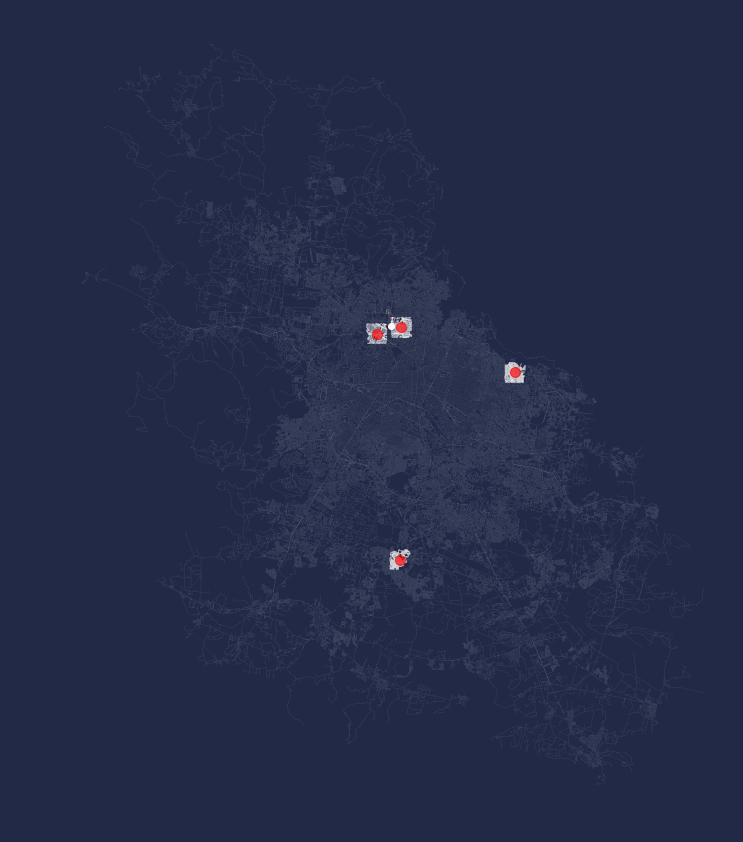

In [29]:
fig, ax = plt.subplots(1,1,figsize = (15,15))
edges_old.plot(ax=ax, color='w', zorder=-1, alpha=0.05, linewidth=0.5)
gdf_.plot(ax=ax, column='area')
edges.plot(ax=ax, color='w', zorder=1, alpha=0.25, linewidth=1)
gdf_est_.plot(ax=ax, color='red', markersize=100, alpha=0.65, legend=False)
ax.axis('off')
plt.savefig('../output/figures/AreaEstudio.png',dpi=300,transparent=False)

In [11]:
gdf_.head(1)

unique_id      osmid element_type  \
0  way/158288130  158288130          way   

                                               nodes   amenity building  \
0  [1705161785, 1705161788, 1705161789, 170516178...  townhall      yes   

                           name  \
0  Palacio Municipal de Zapopan   

                                            geometry religion shop  ...  \
0  POLYGON ((667646.561 2292175.764, 667653.861 2...      NaN  NaN  ...   

  name:es type wikidata wikipedia                      Estacion         area  \
0     NaN  NaN      NaN       NaN  Mercado Municipal de Zapopan  2629.265098   

        kWh_year note sport branch  
0  619755.344498  NaN   NaN    NaN  

[1 rows x 48 columns]

In [20]:
gdf_est_.sort_values('kWh_year',ascending=False,inplace=True)

/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
gdf_est_

Nombre    Latitud    Longitud  \
0                       Mercado Municipal de Zapopan  20.722076 -103.391246   
1               Centro Cultural Constitución Zapopan  20.727291 -103.368109   
3  LabASE, Laboratorio de Arquitectura Social Est...  20.524669 -103.371598   
2  Comisaría de la Policía Municipal de Tonalá, D...  20.686951 -103.263205   

                         geometry          area      kWh_year  
0  POINT (667520.005 2292221.880)  65650.069086  1.547466e+07  
1  POINT (669923.977 2292823.305)  35472.272374  8.361321e+06  
3  POINT (669785.214 2270389.022)  25672.320142  6.051333e+06  
2  POINT (680897.621 2288471.012)  18551.005859  4.372737e+06

/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


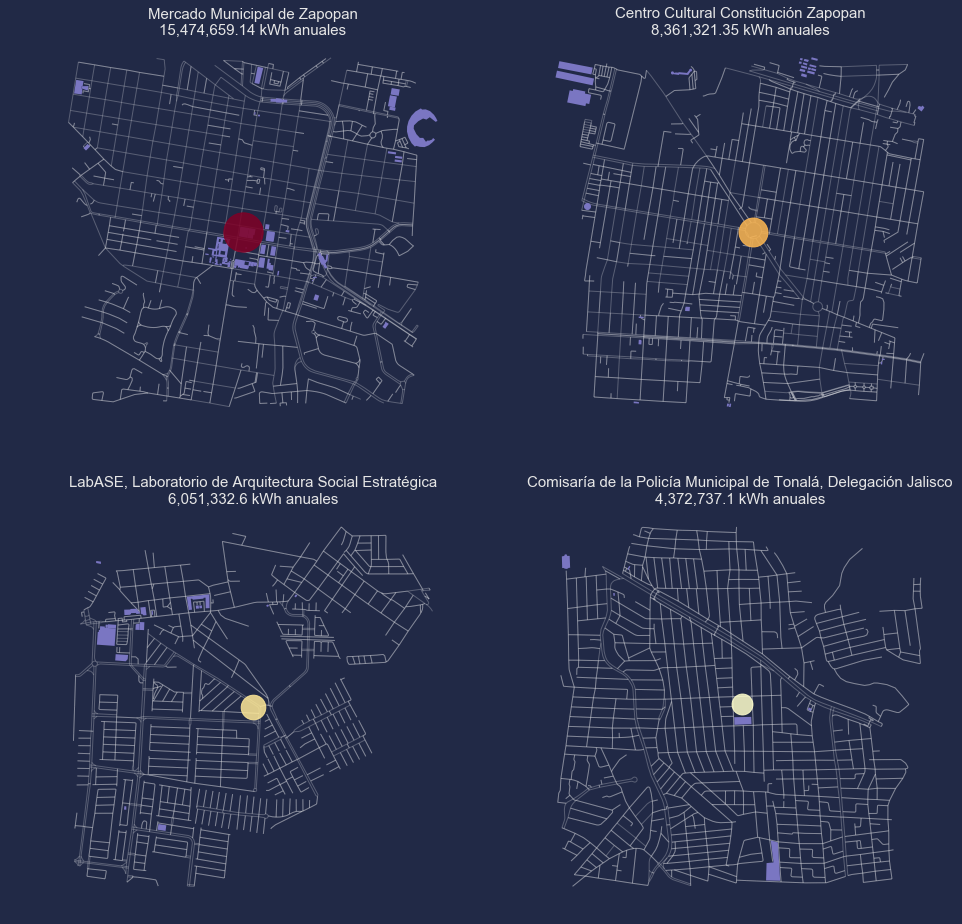

In [44]:
fig, axes = plt.subplots(2,2,figsize = (16,16))
for i, ax in zip(gdf_est_.index.tolist(), axes.flatten()):
    est = gdf_est.at[i,'Nombre']
    gdf_[gdf_['Estacion'] == est].plot(ax=ax, color='#7A76C2', zorder=2)
    edges[edges['Estacion'] == est].plot(ax=ax, color='w', zorder=1, alpha=0.25, linewidth=1)
    gdf_est_[gdf_est_['Nombre'] == est].plot(ax=ax, column ='kWh_year', cmap='YlOrRd', markersize=gdf_est_[gdf_est_['Nombre'] == est]['kWh_year']/10000, alpha=0.85, zorder=3, vmin=gdf_est_['kWh_year'].min(), vmax=gdf_est_['kWh_year'].max())
    if ',' in est:
        name_ = ','.join(est.split(',',maxsplit=2)[:2])
    else:
        name_ = est
    ax.set_title('{}\n{:,} kWh anuales'.format(name_, round(gdf_est_[gdf_est_['Nombre'] == est]['kWh_year'].values[0],2)), fontsize=15)
    ax.axis('off')
for ax in axes.flatten()[46:]:
    ax.set_visible(False)
plt.savefig('../output/figures/potencial_solar/Potencial_pipV2_Mapa.png',dpi=300)

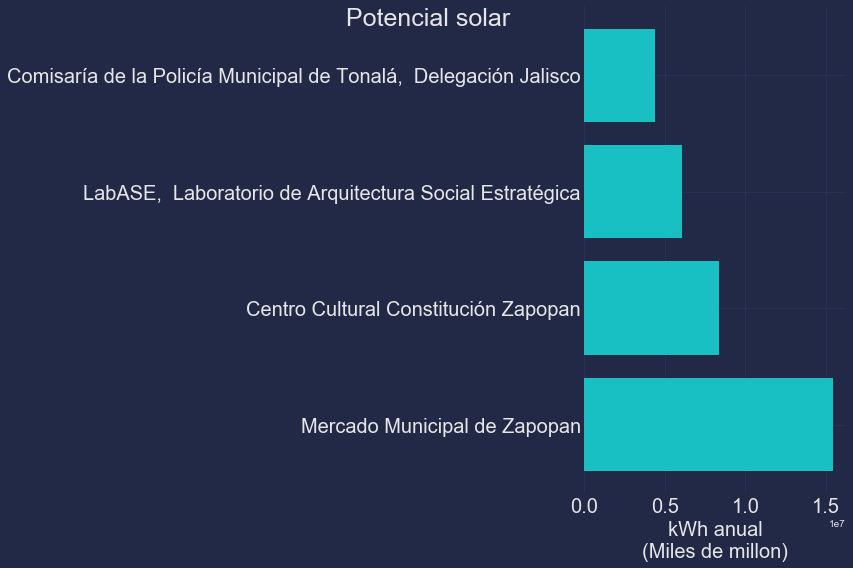

In [46]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.barh(gdf_est_['Nombre'].apply(lambda x: ', '.join(x.split(',',maxsplit=2)[0:2]) if ',' in x else x), gdf_est_['kWh_year'])
ax.set_xlabel('kWh anual\n(Miles de millon)',fontsize=20)
ax.tick_params(labelsize=20)
fig.suptitle('Potencial solar',fontsize=25)
fig.tight_layout()
plt.savefig('../output/figures/potencial_solar/Potencial_pipV2.png',dpi=300)